## Using the `filter()` function

The `filter()` function provides a way for users to create ad-hoc subsets of Flexoki colors, based on hue and lightness values.

It is callable from both the `FlexokiSchema` and `FlexokiSchema.colors` classes, with no differences between the two.

In [1]:
from flexoki import Flexoki

Flexoki.filter()
Flexoki.colors.filter() # equivalent

### Filtering by `hue`

The following inputs are accepted to filter by hue:

- `None`: if `None` is passed, no filtering is done, and all hues will be returned. *This is the default.*

- A single color name, such as `red`, will return just that hue.

- A *list* of color names, such as `["red", "green", "purple"]`, will return those hues *in that order*.

- A single color letter, such as `r` for red, `p` for purple, or `k` for grey, will return just that hue.

- A *list* of color letters, such as `["r", "g", "p"]`, will return those hues *in that order*.

- A *string* of color letters, such as `"rgp"`, will be parsed the same as the list above, returning those hues *in that order*.

The mapping of single-letter color codes to their corresponding names is available in `utils.h_codes`, and also corresponds to the `h` property of each `Color` object.

In [2]:
# Returning monochromatic palettes
Flexoki.filter(h="red") # will return only the red hues
Flexoki.filter(h="g") # will return only the green hues

In [3]:
# Returning multiple hues at once
# All examples here will be for red-blue-cyan-yellow-base
Flexoki.filter(h=["red","blue","cyan","yellow","base"]) 
Flexoki.filter(h=["red","blue","cyan","yellow","grey"]) # there are several aliases that work for the base palette - grey/gray, black, white
Flexoki.filter(h=["r","b","c","y","k"])
Flexoki.filter(h="rbcyk") # the shortest, most efficient way of doing so

### Filtering by `lightness`

The following inputs are accepted to filter by lightness:

- `None`: if `None` is passed, no filtering is done, and all lightness values will be returned. *This is the default.*

- A single lightness value, such as `400`, will return just the hues matching that lightness.

- A *list* of lightness values, such as `[300, 150, 600]`, will return those lightness values *in that order*.

- A `slice` or `range` object, such as `range(600,300)`, will return the lightness values between the `start` and `end` of that object, *inclusive of the start and end*.

Remember that not all values between 0 and 1000 are instantiated - namely, values such as 450 and 550 do not exist, as of the Flexoki 2.0 update. The full list of lightness values is available in `utils.l_values`, and also corresponds to the `l` property of each `Color` object.

In [4]:
Flexoki.filter(l=150) # will return only the hues with a lightness value of 150
Flexoki.filter(l=[300,150,600]) # will return each of these lightness values
Flexoki.filter(l=range(600,300)) # will return all lightness values between 600 and 300, including 600 and 300

### Return Order

If multiple hues and lightness values are selected, the user has the option of selecting how they would like the colors ordered when returned, via the `order` argument:

- If `order` is `None` or `h_l`: colors are ordered by lightness within their hue group, ex. `["red-150","red-200","green-150","green-200",...]`. *This is the default*.

- If `order` is `l_h`: colors are ordered by hue within their lightness group, ex. `["red-150","green-150","red-200","green-200",...]`

In [5]:
h_l = Flexoki.filter(h="kob", l=[800,200,500], order="h_l")
print(f"h_l: {h_l.names()}")
l_h = Flexoki.filter(h="kob", l=[800,200,500], order="l_h")
print(f"l_h: {l_h.names()}")

h_l: ['base-800', 'base-200', 'base-500', 'orange-800', 'orange-200', 'orange-500', 'blue-800', 'blue-200', 'blue-500']
l_h: ['base-800', 'orange-800', 'blue-800', 'base-200', 'orange-200', 'blue-200', 'base-500', 'orange-500', 'blue-500']


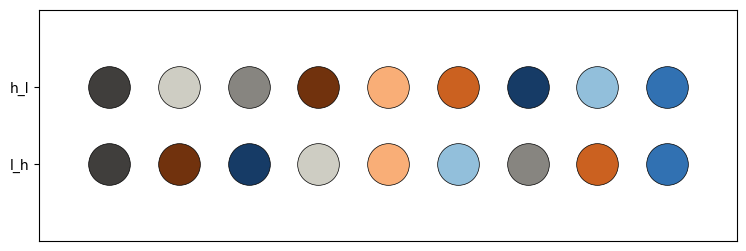

In [6]:
import matplotlib.pyplot
fig, ax = matplotlib.pyplot.subplots(1,1, figsize=(9,3))
ax.set_xlim(0,10)
ax.set_ylim(0,3)
ax.set_yticks(range(1,3))
ax.set_yticklabels(["l_h","h_l"])
ax.set_xticks([])

for y,p in zip(range(1,3), [l_h,h_l]):
    for x,c in enumerate(p.colors):
        ax.plot(x+1,y, marker="o", markerfacecolor=c.hex, markeredgecolor="black", markersize=30, markeredgewidth=0.5)

### Return Type

The `returns` argument allows the user to specify what type of object they want returned, that may best suit their specific use case.

- `None` or `palette`: return a `Palette`. *This is the default*.

- `colors` or `colours`: a list of `Color` objects.

- `hexes`, `rgb`, or `rgba`: a list of hex codes or rgb(a) tuples for each color.

In [7]:
print(Flexoki.filter(h=["orange","green"], l=[800,500], returns="colors"))
print(Flexoki.filter(h=["orange","green"], l=[800,500], returns="hexes"))
print(Flexoki.filter(h=["orange","green"], l=[800,500], returns="rgb"))

[Color(name='orange-800', h='o', l=800, hex='#71320D', rgb=(113, 50, 13)), Color(name='orange-500', h='o', l=500, hex='#CB6120', rgb=(203, 97, 32)), Color(name='green-800', h='g', l=800, hex='#3D4C07', rgb=(61, 76, 7)), Color(name='green-500', h='g', l=500, hex='#768D21', rgb=(118, 141, 33))]
['#71320D', '#CB6120', '#3D4C07', '#768D21']
[(113, 50, 13), (203, 97, 32), (61, 76, 7), (118, 141, 33)]
